In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL
    )
''')

sample_data = [
    ('Product A', 10, 15.0),
    ('Product B', 5, 20.0),
    ('Product A', 7, 15.0),
    ('Product C', 3, 25.0),
    ('Product B', 2, 20.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)


conn.commit()
conn.close()

print("✅ sales_data.db created and populated with sample data.")


✅ sales_data.db created and populated with sample data.


In [2]:
import os
print(os.getcwd())


C:\Users\Ismail\OneDrive\Desktop\jupyter projects


In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = '''
    SELECT 
        product, 
        SUM(quantity) AS total_quantity, 
        SUM(quantity * price) AS total_revenue
    FROM sales
    GROUP BY product
'''

df = pd.read_sql_query(query, conn)

conn.close()

print("✅ Sales Summary:")
print(df)


ModuleNotFoundError: No module named 'pandas'

In [4]:
import sqlite3
import pandas as pd

# Step 1: Connect to the existing database
conn = sqlite3.connect("sales_data.db")

# Step 2: Define the SQL query to summarize quantity and revenue
query = '''
    SELECT 
        product, 
        SUM(quantity) AS total_quantity, 
        SUM(quantity * price) AS total_revenue
    FROM sales
    GROUP BY product
'''

# Step 3: Run the query and load the result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Step 4: Close the connection
conn.close()

# Step 5: Print the result
print("✅ Sales Summary:")
print(df)


✅ Sales Summary:
     product  total_quantity  total_revenue
0  Product A              17          255.0
1  Product B               7          140.0
2  Product C               3           75.0


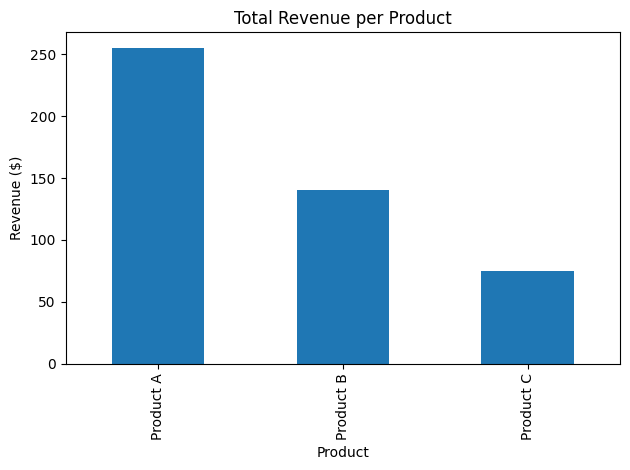

In [5]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='total_revenue', legend=False)

plt.title('Total Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.tight_layout()

plt.show()


